In [179]:
# モジュールのインポート
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

X = pd.read_csv('house_price.csv')
y = pd.read_csv('y.csv')

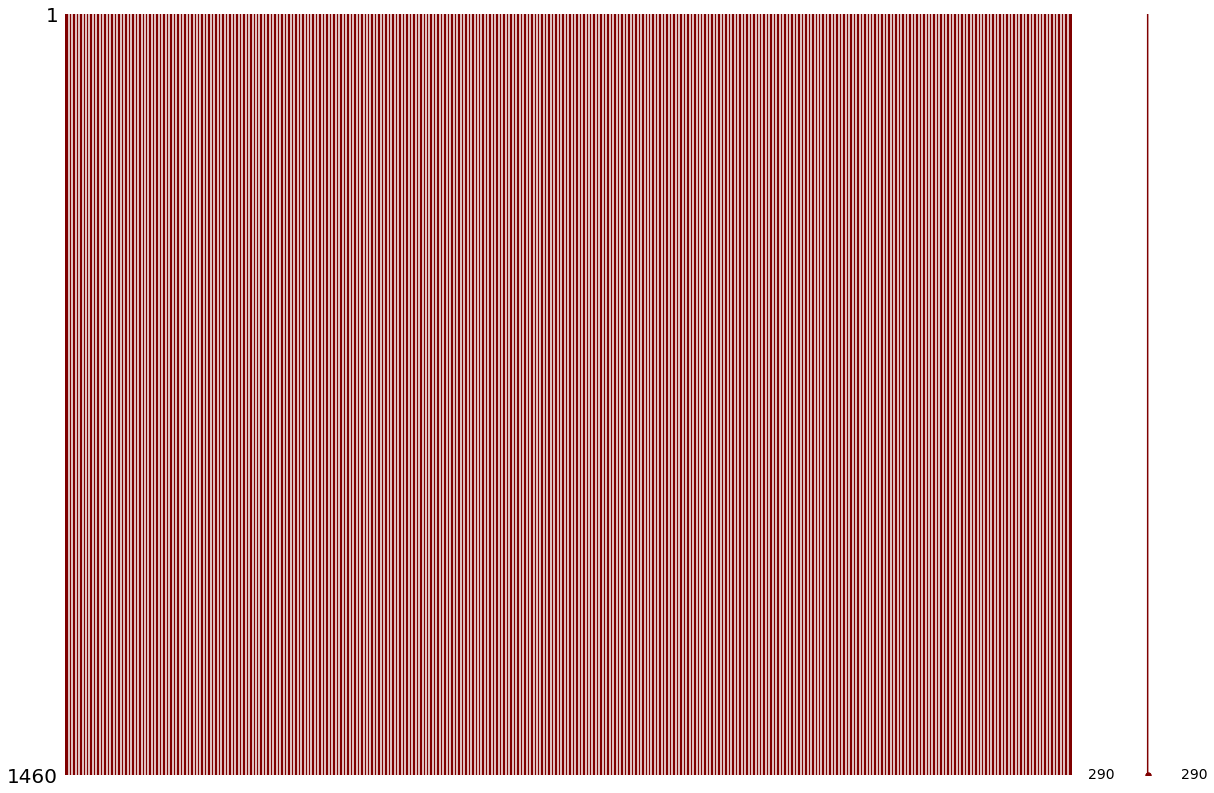

In [165]:
import missingno as msno
msno.matrix(df=X, figsize=(20,14), color=(0.5,0,0))
#欠損値なし

In [166]:
#目的変数yとの相関を表示
from pandas import Series
data = pd.concat([X, y], axis=1)
corr = data.corr()
corr = corr[290:]
corr

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,y
y,0.209624,0.388528,0.041036,-0.256666,0.014314,-0.050158,0.790982,-0.053177,0.520575,0.506848,...,0.357509,-0.034895,-0.242598,-0.118069,-0.050686,-0.015525,-0.04648,-0.15399,0.35206,1.0


In [167]:
#相関が強い(0.6以上)を表示
print(index_corr[index_corr>0.6])

6      0.790982
11     0.673241
26     0.695147
33     0.659600
39     0.640409
40     0.623431
53     0.662653
67     0.615318
73     0.624572
81     0.631731
82     0.758921
83     0.700568
290    1.000000
dtype: float64


In [168]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [169]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [170]:
lr.fit(X_train, y_train)
coef = lr.coef_.reshape(-1)
index_coef = Series(coef)
print(index_coef[index_coef>200000])

8     532009.735597
11    353549.397590
12    283792.336561
32    291602.299666
41    241805.026445
42    267594.845347
55    235066.246645
dtype: float64


In [171]:
print(index_coef[index_coef<-100000])

66    -145102.192284
67    -179849.163411
69    -198153.576213
70    -223967.971631
71    -140456.125558
72    -130388.874014
74    -224229.702358
157   -260808.795432
dtype: float64


In [172]:
data_check = data.iloc[:, [6, 11, 26, 33, 39, 40, 53, 67, 73, 81, 82, 83, 8, 12, 32, 41, 42, 55, 66, 67, 69, 70, 71, 72, 74, 157]]
data_check.columns

Index(['OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual', 'GarageCars',
       'GarageArea', 'SimplOverallQual', 'SimplExterQual', 'GarageScore',
       'TotalBath', 'AllSF', 'AllFlrsSF', 'YearBuilt', 'ExterCond',
       'KitchenAbvGr', 'GarageQual', 'GarageCond', 'SimplPoolQC',
       'SimplExterCond', 'SimplExterQual', 'GarageGrade', 'ExterGrade',
       'KitchenScore', 'FireplaceScore', 'PoolScore', 'Condition2_PosN'],
      dtype='object')

In [173]:
# データセットの分割
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(data_check, y, test_size=0.3, random_state=0)

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc2.fit(X2_train, y2_train)

/Users/sho/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

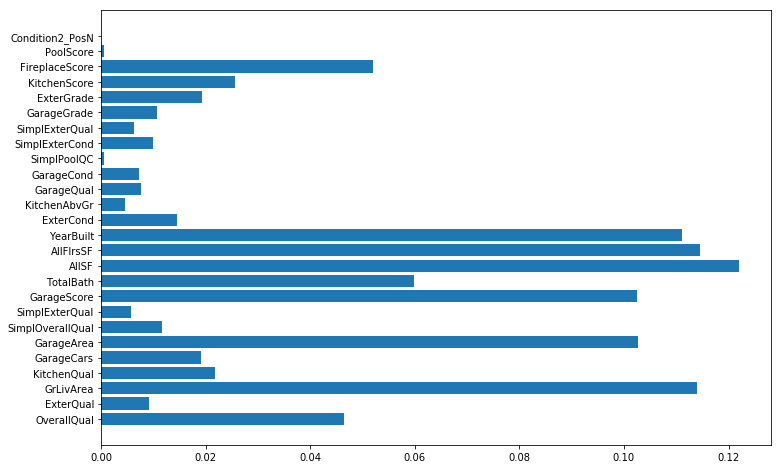

array([  4.64587817e-02,   9.23129164e-03,   1.13883395e-01,
         2.18864618e-02,   1.90456437e-02,   1.02622916e-01,
         1.16684699e-02,   5.83741691e-03,   1.02573139e-01,
         5.98433259e-02,   1.21940663e-01,   1.14477268e-01,
         1.11191419e-01,   1.44477142e-02,   4.57356403e-03,
         7.71888450e-03,   7.25600799e-03,   6.03291377e-04,
         9.96629661e-03,   6.29580580e-03,   1.07179623e-02,
         1.92929231e-02,   2.56962543e-02,   5.20650489e-02,
         6.18852491e-04,   8.72026470e-05])

In [180]:
# 特徴量の重要度をグラフに出力
n_features = len(data_check.columns)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc2.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), data_check.columns)
plt.show()

In [181]:
final_data = data.iloc[:, [6, 26, 40, 73, 83, 8, 12, 32, 41, 71, 72, 74]]

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(final_data, y, test_size=0.3, random_state=0)

In [182]:
model_quad = LinearRegression()
model_quad.fit(X3_train, y3_train)

def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

print('R^2')
print('train: %.3f' % model_quad.score(X3_train, y3_train))
print('test : %.3f' % model_quad.score(X3_test, y3_test))
print('')

# 2次関数
print('adjusted R^2')
print('train: %.3f' % adjusted(model_quad.score(X3_train, y3_train), len(y3_train), 21))
#train: 0.857
print('test : %.3f' % adjusted(model_quad.score(X3_test, y3_test), len(y3_test), 21))
#test : 0.744
print('')

# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y3_train, model_quad.predict(X3_train)) ** (1/2)))
print('test : %.3f' % (mse(y3_test, model_quad.predict(X3_test)) ** (1/2)))
print('')

R^2
train: 0.777
test : 0.725

adjusted R^2
train: 0.772
test : 0.711

RMSE
train: 36902.682
test : 43192.692



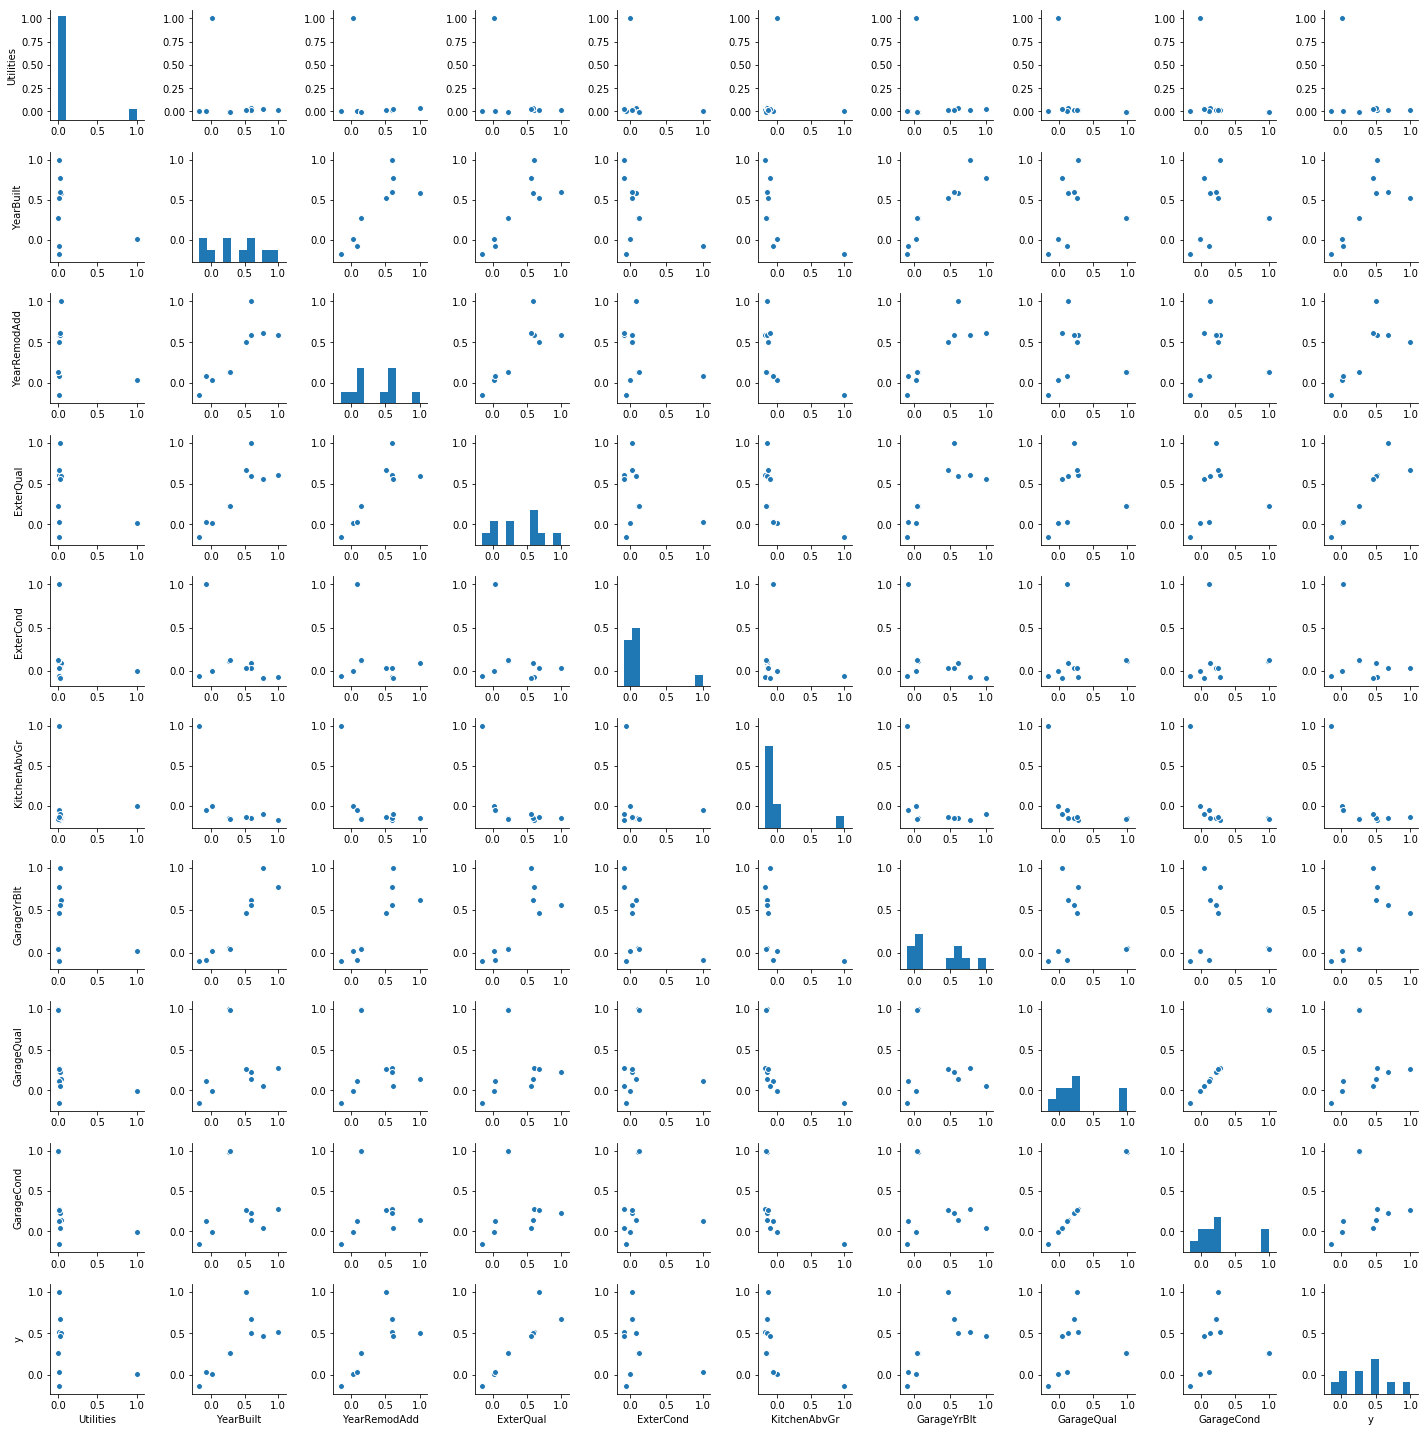

In [123]:
# data_check = data.iloc[:, [4, 8, 9, 11, 12, 32, 38, 41, 42]]
# data_check.head()
# corr_check = pd.concat([data_check, y], axis=1)
# corr = corr_check.corr()

# # 散布図行列を出力
# # locメソッドで一部の特徴量だけをピックアップ
# import seaborn as sns
# sns.pairplot(corr, size=2.0)
# plt.show()

In [184]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(data_check, y_std, test_size = 0.3, random_state = 0)

In [185]:
model_quad = LinearRegression()
model_quad.fit(X_train_std, y_train_std)

def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

print('R^2')
print('train: %.3f' % model_quad.score(X_train_std, y_train_std))
print('test : %.3f' % model_quad.score(X_test_std, y_test_std))
print('')

# 2次関数
print('adjusted R^2')
print('train: %.3f' % adjusted(model_quad.score(X_train_std, y_train_std), len(y_train_std), 21))
#train: 0.857
print('test : %.3f' % adjusted(model_quad.score(X_test_std, y_test_std), len(y_test_std), 21))
#test : 0.744
print('')

# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train_std, model_quad.predict(X_train_std)) ** (1/2)))
print('test : %.3f' % (mse(y_test_std, model_quad.predict(X_test_std)) ** (1/2)))
print('')

R^2
train: 0.820
test : 0.733

adjusted R^2
train: 0.817
test : 0.720

RMSE
train: 0.417
test : 0.536



In [ ]:
# #標準化
# ss = StandardScaler()
# X_std = ss.fit_transform(X)
# y_std = ss.fit_transform(y)